## Tugas 1: Multiple Linear Regression

#### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

#### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

#### 3. Lakukan feature scaling jika diperlukan.

#### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

#### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

#### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [7]:
# import library
import numpy as np
import pandas as pd

# Import / baca data dari file csv
data = pd.read_csv('data/insurance.csv')

# Melihat beberapa data awal
data.head()

# Mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
# data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


c:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


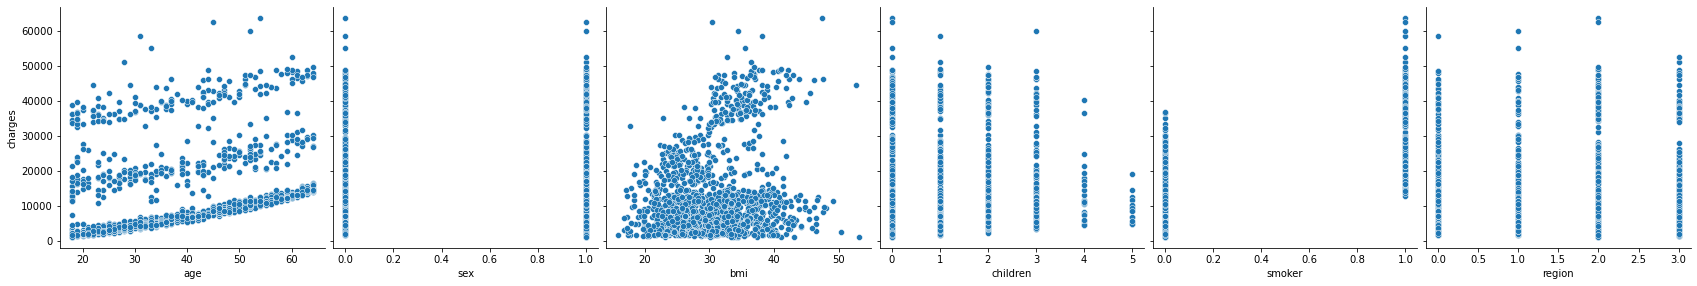

In [41]:
# Import library matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Penggunaan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker','region'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()


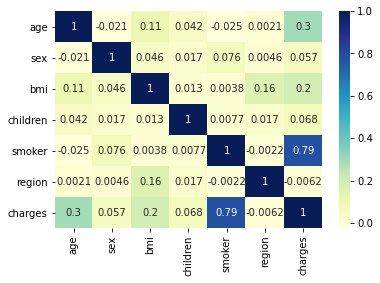

In [18]:
# Penggunaan heatmap
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [43]:
# menentukan variabel independen dan dependen
X = data.drop(columns = 'charges')
y = data['charges']

In [44]:
# Membagi data latih dan data uji (proporsi 7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

Konstanta         :  -10428.119803691518
Koefisien Regresi :  [ 2.59634761e+02 -5.43235302e-02  2.93390832e+02  4.67684029e+02
  2.40111697e+04 -4.99424941e+02]


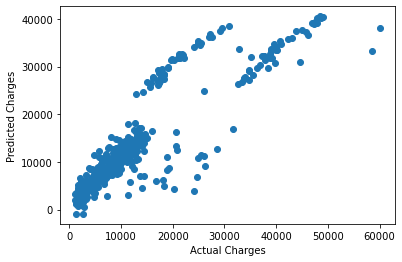

Hasil Prediksi dan Nilai Target


,Actual Value,Predicted value
12,1826.84300,4137.795178
306,20177.67113,4346.994621
318,7421.19455,8607.174287
815,1877.92940,2995.801113
157,15518.18025,25642.535475


In [47]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(X_train, y_train)
a = mdl.intercept_
b = mdl.coef_
print("Konstanta         : ", a)
print("Koefisien Regresi : ", b)

y_pred = mdl.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

print("Hasil Prediksi dan Nilai Target")
dt = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred})
dt.head()


In [50]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
regressor = LinearRegression()
regressor.fit(X, y)

# Make predictions
y_pred = regressor.predict(X)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

MAE: 0.8025282908802864
MSE: 0.9978497163877387
R-squared: 0.002150283612261328
